# Coronary Heart Disease Prediction

In [857]:
import pandas as pd
import numpy as np
import os
from numpy import mean
from numpy import std

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

# Import data

In [858]:
data=pd.read_csv("framingham.csv")

In [859]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4135 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4211 non-null float64
BPMeds             4187 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4190 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4221 non-null float64
heartRate          4239 non-null float64
glucose            3852 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [860]:
#data.head()

# Feature exploration: Correlation between each feature and TenYearCHD

### 1. relationship between male and TenYearCHD

In [861]:
data[["male","TenYearCHD"]].groupby(["male"],as_index=False).mean().sort_values(by="TenYearCHD",ascending=False)

#conclusion: male has slightly higher chance of getting CHD

,male,TenYearCHD
1,1,0.188462
0,0,0.124380


### 2. relationship between age and TenYearCHD

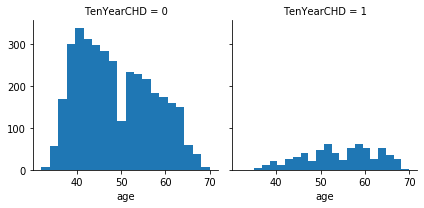

In [862]:
g = sns.FacetGrid(data,col="TenYearCHD")
g.map(plt.hist,"age",bins=20)
# Conclusion: people under age of 50 have lower CHD rate

### 3. relationship between age and TenYearCHD

In [863]:
data[["education","TenYearCHD"]].groupby(["education"],as_index=False).mean().sort_values(by="TenYearCHD",ascending=False)
#conclusion: people with"some high school" degree, have higher chance of getting CHD.

,education,TenYearCHD
0,1.0,0.187791
3,4.0,0.147992
2,3.0,0.127721
1,2.0,0.117318


### 4. relationship between currentSmoker and TenYearCHD

In [864]:
data[["currentSmoker","TenYearCHD"]].groupby(["currentSmoker"],as_index=False).mean().sort_values(by="TenYearCHD",ascending=False)
#conclusion: people who is currently a smoker, has higher chance of developing CHD

,currentSmoker,TenYearCHD
1,1,0.158950
0,0,0.144988


### 5. cigsPerDay and TenYearCHD

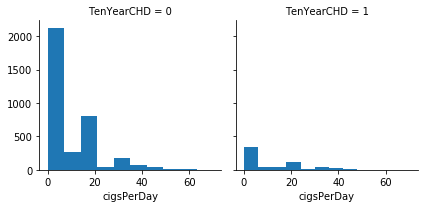

In [865]:
g=sns.FacetGrid(data, col="TenYearCHD")
g.map(plt.hist,"cigsPerDay", bins=10)
#Conclusion: people who smoke 0 cig/day, have higher chance of NOT getting CHD. 

### 6. BPMeds and TenYearCHD

In [866]:
data[["BPMeds","TenYearCHD"]].groupby("BPMeds", as_index=False).mean().sort_values(by="TenYearCHD", ascending=False)
#Conclusion: people who are on Blood Pressure medication is more likely developing CHD. 

,BPMeds,TenYearCHD
1,1.0,0.330645
0,0.0,0.145705


### 7. prevalentStroke and TenYearCHD

In [867]:
data[["prevalentStroke","TenYearCHD"]].groupby("prevalentStroke", as_index=False).mean().sort_values("TenYearCHD", ascending=False)
#conclusion: people with prevalent Stroke have HIGHER chance of getting CHD

,prevalentStroke,TenYearCHD
1,1,0.440000
0,0,0.150178


### 8. prevalentHyp and TenYearCHD

In [868]:
data[["prevalentHyp","TenYearCHD"]].groupby("prevalentHyp", as_index=False).mean().sort_values("TenYearCHD", ascending=False)
#conclusion: people with prevalent Hyp have HIGHER chance of getting CHD

,prevalentHyp,TenYearCHD
1,1,0.246773
0,0,0.109134


### 9. diabetes and Ten Year CHD 

In [869]:
data[["diabetes","TenYearCHD"]].groupby("diabetes", as_index=False).mean().sort_values("TenYearCHD", ascending=False)
#conclusion: people with diabetes have HIGHER chance of getting CHD

,diabetes,TenYearCHD
1,1,0.366972
0,0,0.146212


### 10. totChol and TenYearCHD

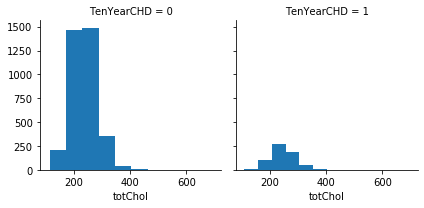

In [870]:
g=sns.FacetGrid(data, col="TenYearCHD")
g.map(plt.hist,"totChol", bins=10)
#Conclusion: people have lower totChol, have lower chance getting CHD

### 11. sysBP and TenYearCHD

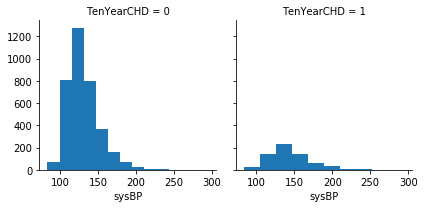

In [871]:
g=sns.FacetGrid(data, col="TenYearCHD")
g.map(plt.hist, "sysBP")
#conclusion:people with lower sysBP, have higher chance NOT getting CHD

### 12. diaBP and TenYearCHD

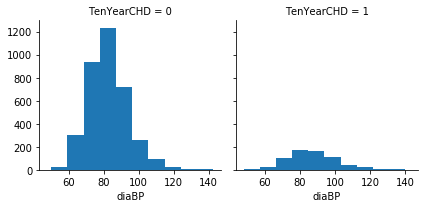

In [872]:
g=sns.FacetGrid(data, col="TenYearCHD")
g.map(plt.hist, "diaBP")
#conclusion: people with diaBP between 60-90, have higher chance not getting CHD

### 13. BMI and TenYearCHD

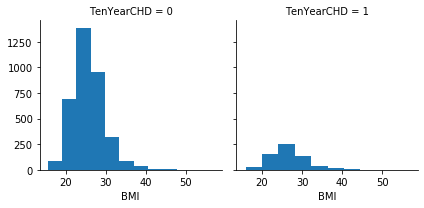

In [873]:
g=sns.FacetGrid(data, col="TenYearCHD")
g.map(plt.hist, "BMI")
#conclusion: people with lower BMI, have higher chance NOT getting CHD

### 14.heartRate and TenYearCHD 

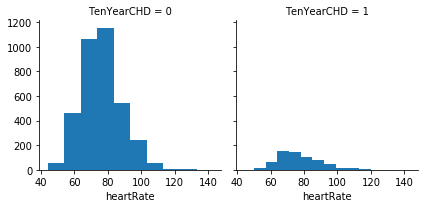

In [874]:
g=sns.FacetGrid(data, col="TenYearCHD")
g.map(plt.hist, "heartRate")
#conclusion: people with lower heartrate, have higher chance NOT getting CHD

### 15. glucose and TenYearCHD

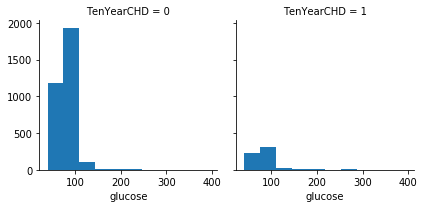

In [875]:
g=sns.FacetGrid(data, col="TenYearCHD")
g.map(plt.hist, "glucose")
#conclusion: people with lower glucose, have higher chance NOT getting CHD

# Visualization of feature correlation - before feature selection

(16.0, 0.0)

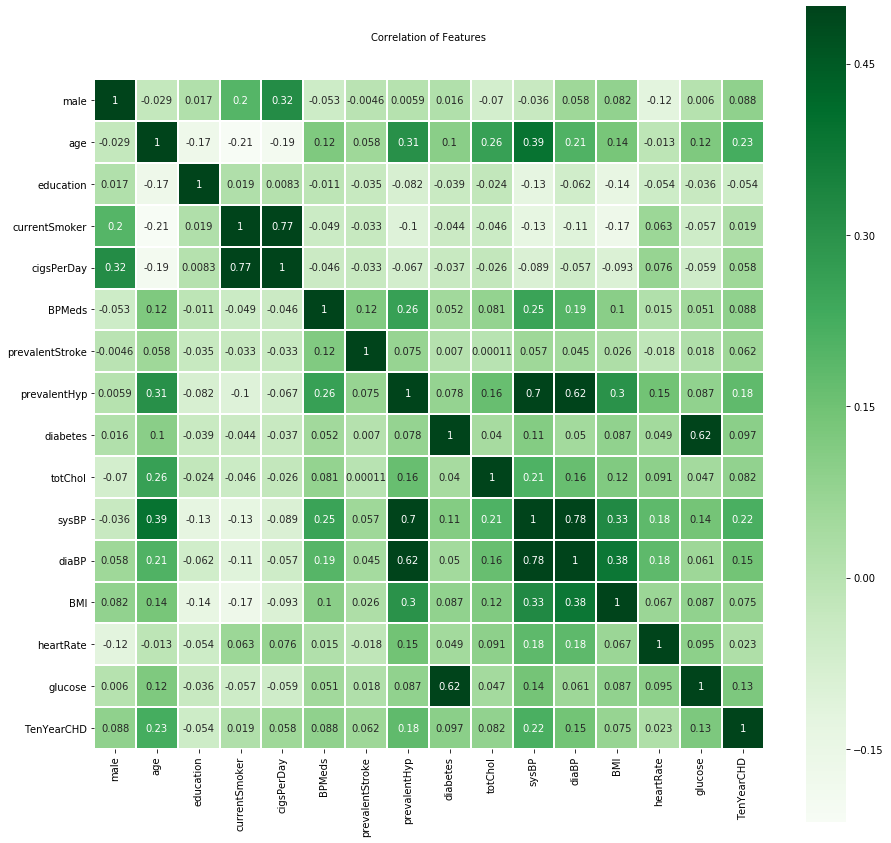

In [876]:
colormap = plt
plt.figure(figsize=(15,15))
plt.title('Correlation of Features', y=1.05, size=10)
ax=sns.heatmap(data.astype(float).corr(),linewidths=1,vmax=0.5,
            square=True, cmap="Greens", annot=True) 
#if i don't run the next 2 lines of code, the heatmap will be cut off.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Missing Values

In [877]:
#count how many missing values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

### 1. education: replace the missing values with most frequent value 

In [878]:
#find the most frequent value: 1.0
data['education'].value_counts()

1.0    1720
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

In [879]:
#replace missing values with "1.0"
def replace_most_common(x):
    if pd.isnull(x):
        return 1.0
    else:
        return x
data['education'] = data['education'].map(replace_most_common)

In [880]:
#count the data again. There are 1825-1720=105 missing values
data['education'].value_counts()

1.0    1825
2.0    1253
3.0     689
4.0     473
Name: education, dtype: int64

# 2. cigsPerDay: replace the missing values with median

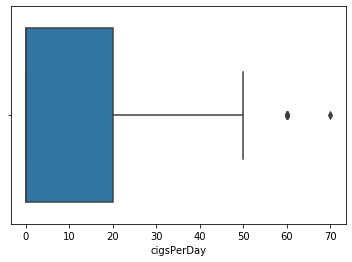

In [881]:
#identify outliers
cig_mean, cig_std = mean(data["cigsPerDay"]), std(data["cigsPerDay"])
cut_off = cig_std * 3
lower, upper = cig_mean - cut_off, cig_mean + cut_off

outliers=[]
for x in data["cigsPerDay"]:
    if x < lower or x > upper:
        outliers.append(x)
        
outliers
sns.boxplot(data["cigsPerDay"] ) 

/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([2.478e+03, 3.070e+02, 9.660e+02, 6.100e+01, 2.190e+02, 1.030e+02,
        5.900e+01, 6.000e+00, 1.100e+01, 1.000e+00]),
 array([ 0.,  7., 14., 21., 28., 35., 42., 49., 56., 63., 70.]),
 <a list of 10 Patch objects>)

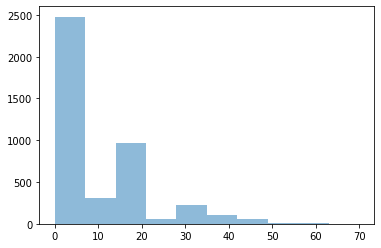

In [882]:
#plot cigPerDay: shows right-skewed
plt.hist(data['cigsPerDay'], alpha=0.5)

In [883]:
#because the col has outliers, so I will fill missing values with median. 
data["cigsPerDay"].fillna(data['cigsPerDay'].median(),inplace=True)

### 3. BPMeds: replace with most common value

In [884]:
data['BPMeds'].value_counts()

0.0    4063
1.0     124
Name: BPMeds, dtype: int64

In [885]:
#replace missing values with "0.0"
def replace_most_common(x):
    if pd.isnull(x):
        return 0.0
    else:
        return x
data['BPMeds'] = data['BPMeds'].map(replace_most_common)

In [886]:
data['BPMeds'].value_counts()

0.0    4116
1.0     124
Name: BPMeds, dtype: int64

### 4. totChol 

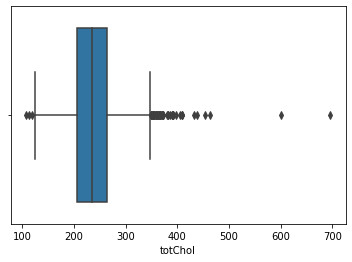

In [887]:
#identify outliers
totChol_mean, totChol_std = mean(data["totChol"]), std(data["totChol"])
cut_off = totChol_std * 3
lower, upper = totChol_mean - cut_off, totChol_mean + cut_off

outliers=[]
for x in data["totChol"]:
    if x < lower or x > upper:
        outliers.append(x)
        
outliers
sns.boxplot(data["totChol"] )

In [888]:
data['totChol'].value_counts()

240.0    85
220.0    70
260.0    62
210.0    61
232.0    59
         ..
107.0     1
338.0     1
364.0     1
398.0     1
405.0     1
Name: totChol, Length: 248, dtype: int64

/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.640e+02, 1.555e+03, 1.898e+03, 5.030e+02, 6.000e+01, 7.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([107. , 165.9, 224.8, 283.7, 342.6, 401.5, 460.4, 519.3, 578.2,
        637.1, 696. ]),
 <a list of 10 Patch objects>)

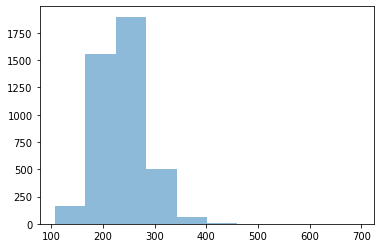

In [889]:
plt.hist(data['totChol'], alpha=0.5)

In [890]:
#Right skewed, fillna with median. 
data["totChol"].fillna(data['totChol'].median(),inplace=True)
data['totChol'].value_counts()

234.0    90
240.0    85
220.0    70
260.0    62
210.0    61
         ..
107.0     1
338.0     1
364.0     1
398.0     1
405.0     1
Name: totChol, Length: 248, dtype: int64

### 5. BMI: replace with median

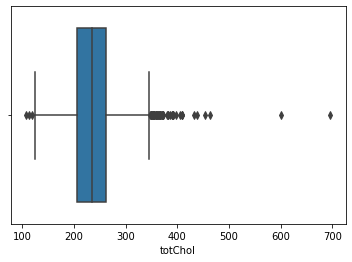

In [891]:
#identify outliers
BMI_mean, BMI_std = mean(data["BMI"]), std(data["BMI"])
cut_off = BMI_std * 3
lower, upper =BMI_mean - cut_off, BMI_mean + cut_off

outliers=[]
for x in data["BMI"]:
    if x < lower or x > upper:
        outliers.append(x)
        
#outliers
sns.boxplot(data["totChol"] )

/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.580e+02, 1.211e+03, 1.751e+03, 8.240e+02, 1.960e+02, 5.800e+01,
        1.700e+01, 4.000e+00, 1.000e+00, 1.000e+00]),
 array([15.54 , 19.666, 23.792, 27.918, 32.044, 36.17 , 40.296, 44.422,
        48.548, 52.674, 56.8  ]),
 <a list of 10 Patch objects>)

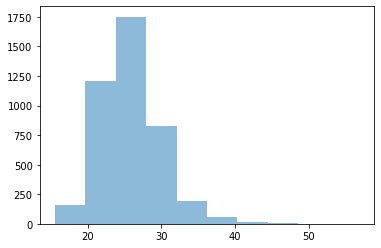

In [892]:
plt.hist(data['BMI'], alpha=0.5)

In [893]:
#because it has outliers, replace missing values with median
data["BMI"].fillna(data['BMI'].median(),inplace=True)

### 6. HeartRate


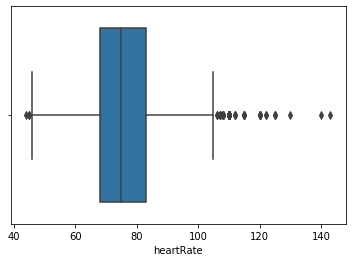

In [894]:
#identify outliers
BMI_mean, BMI_std = mean(data["BMI"]), std(data["BMI"])
cut_off = BMI_std * 3
lower, upper =BMI_mean - cut_off, BMI_mean + cut_off

outliers=[]
for x in data["BMI"]:
    if x < lower or x > upper:
        outliers.append(x)

sns.boxplot(data["heartRate"] )

/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  61.,  538., 1261., 1357.,  646.,  286.,   70.,   14.,    4.,
           2.]),
 array([ 44. ,  53.9,  63.8,  73.7,  83.6,  93.5, 103.4, 113.3, 123.2,
        133.1, 143. ]),
 <a list of 10 Patch objects>)

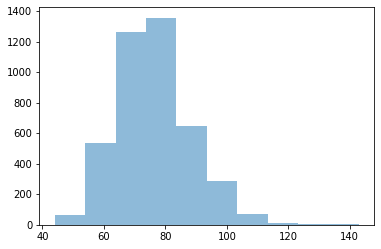

In [895]:
plt.hist(data['heartRate'], alpha=0.5)

In [896]:
#replace with mean
data["heartRate"].fillna(data['heartRate'].mean(),inplace=True)

### 7. glucose 

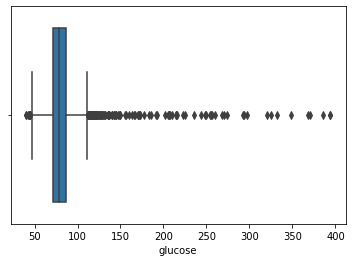

In [897]:
#identify outliers
glucose_mean, glucose_std = mean(data["glucose"]), std(data["glucose"])
cut_off = glucose_std * 3
lower, upper = glucose_mean - cut_off, glucose_mean + cut_off

outliers=[]
for x in data["glucose"]:
    if x < lower or x > upper:
        outliers.append(x)
        
outliers
sns.boxplot(data["glucose"] )

/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1573., 2098.,  127.,   16.,   13.,    6.,    7.,    4.,    3.,
           5.]),
 array([ 40. ,  75.4, 110.8, 146.2, 181.6, 217. , 252.4, 287.8, 323.2,
        358.6, 394. ]),
 <a list of 10 Patch objects>)

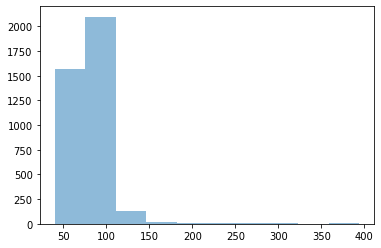

In [898]:
plt.hist(data['glucose'], alpha=0.5)

In [899]:
#the graph shows outlier, replace missing value with median
data['glucose'].fillna(data['glucose'].median(), inplace=True)

# Split data to X and y

In [900]:
#from sklearn.model_selection import train_test_split
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [901]:
data.info() #shows no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# Feature Selection 

### 1.PCA

### 2. Backward elimination: before append column of ones, X has 15 columns

In [906]:
X.shape

(4240, 15)

---------------------------------------------------------------------------------
Before we begin with Backward elimination, we need to append ‘1’ at the beginning of our data set. Now, why is this important?
For performing Backward elimination, we are required to use the linear model provided by statsmodels library — which does not consider the bias term. Hence, by adding a dummy feature with value as ‘1’, our equation becomes y=b.x0+m1.x1+m2.x2+m3.x3+m4.x4 where x0 = 1.

In [907]:
#append column of ones
X_with_ones= np.append (arr=np.ones([X.shape[0],1]).astype(int), values = X, axis = 1)
print("before Elimination, there are",X_with_ones.shape[1],"columns")

before Elimination, there are 16 columns


In [908]:
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars= len(x[0])
    for i in range(0, numVars):
        obj_OLS= sm.OLS(y, x).fit()
        maxVar= max(obj_OLS.pvalues).astype(float)
        if maxVar> sl:
            for j in range(0, numVars-i):
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    obj_OLS.summary()
    return x

In [909]:
SL=0.05
X_modeled=backwardElimination(X_with_ones, SL)
X_modeled.shape
print("after backward elimination, there are 7 columns left.")

after backward elimination, there are 7 columns left.


In [910]:
#X_modeled=pd.DataFrame(X_modeled)
if isinstance(X_modeled, pd.DataFrame):
    print("X_modeled it is a dataframe")
else:
    print("X_modeled is not a dataframe")

X_modeled is not a dataframe


# Split Data

In [911]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_modeled,y,test_size=0.25)

# Model 1 - SVM

### SVM - validation 

In [912]:
svc = SVC(kernel="rbf",gamma='auto')
svc.fit(X_train, y_train)
predict_svc=svc.predict(X_test)
SVM_score=svc.score(X_test, y_test)*100
print(SVM_score)#validation

84.15094339622642


### SVM - KFold cross validation

In [913]:
from sklearn.model_selection import KFold

def run_kfold(svc):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_modeled):
        fold += 1
        X_train, X_test = X_modeled[train_index], X_modeled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        svc.fit(X_train, y_train)
        accuracy_svc = svc.score(X_test, y_test)*100
        outcomes.append(accuracy_svc)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_svc))     
    mean_outcome_svc = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_svc)) #KFold cross validation
    return(mean_outcome_svc)
    

svc_KFoldScore=run_kfold(svc)
svc_KFoldScore

Fold 1 accuracy: 81.13207547169812
Fold 2 accuracy: 84.90566037735849
Fold 3 accuracy: 85.14150943396226
Fold 4 accuracy: 87.5
Fold 5 accuracy: 84.43396226415094
Fold 6 accuracy: 83.9622641509434
Fold 7 accuracy: 83.72641509433963
Fold 8 accuracy: 84.90566037735849
Fold 9 accuracy: 85.61320754716981
Fold 10 accuracy: 83.49056603773585
Mean Accuracy: 84.48113207547169


84.48113207547169

### confusion matrix - svm

[[892   3]
 [165   0]]


(2.0, 0.0)

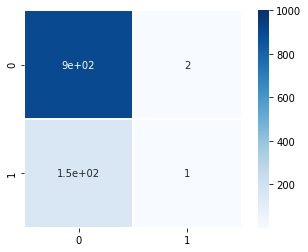

In [914]:
results_svm = confusion_matrix(y_test, predict_svc) 
print(results_svm)
ax=sns.heatmap(results_csv,linewidths=1,vmax=1000,
            square=True, cmap="Blues",annot=True)
#if i don't run the next 2 lines of code, the heatmap will be cut off.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Model 2 - Logistic Regression

### LR - Validation 

In [915]:
logreg = LogisticRegression(solver="lbfgs",max_iter=300)#if i don't set solver and max_iter, there will be an warning.
logreg.fit(X_train,y_train)
predict_logreg=logreg.predict(X_test)
Logistic_regression_score=logreg.score(X_test, y_test)*100
print(Logistic_regression_score)

85.28301886792453


### LR - Kfold cross validation

In [916]:
def run_kfold(logreg):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_modeled):
        fold += 1
        X_train, X_test = X_modeled[train_index], X_modeled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        logreg.fit(X_train, y_train)
        accuracy_lr = logreg.score(X_test, y_test)*100
        outcomes.append(accuracy_lr)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_lr))     
    mean_outcome_logistic_regression = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_logistic_regression)) #KFold cross validation
    return(mean_outcome_logistic_regression)
logreg_Kfoldscore=run_kfold(logreg)

Fold 1 accuracy: 81.36792452830188
Fold 2 accuracy: 85.84905660377359
Fold 3 accuracy: 85.84905660377359
Fold 4 accuracy: 87.97169811320755
Fold 5 accuracy: 85.84905660377359
Fold 6 accuracy: 83.9622641509434
Fold 7 accuracy: 86.55660377358491
Fold 8 accuracy: 86.08490566037736
Fold 9 accuracy: 86.08490566037736
Fold 10 accuracy: 83.9622641509434
Mean Accuracy: 85.35377358490565


### confusion matrix - logistic regression

[[889   6]
 [150  15]]


(2.0, 0.0)

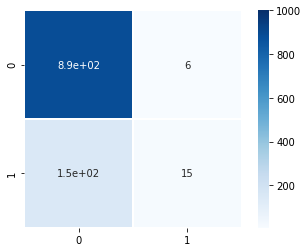

In [917]:
results_lr = confusion_matrix(y_test, predict_logreg) 
print(results_lr)
ax=sns.heatmap(results_lr,linewidths=1,vmax=1000,
            square=True, cmap="Blues",annot=True)
#if i don't run the next 2 lines of code, the heatmap will be cut off.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Model 3 - KNN

### KNN Validation

In [918]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predict_knn=knn.predict(X_test)
knn_score =knn.score(X_test, y_test) * 100
print(knn_score)

81.88679245283019


### KNN - Kfold cross validation

In [919]:
def run_kfold(knn):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_modeled):
        fold += 1
        X_train, X_test = X_modeled[train_index], X_modeled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        knn.fit(X_train, y_train)
        accuracy_knn = knn.score(X_test, y_test)*100
        outcomes.append(accuracy_knn)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_knn))     
    mean_outcome_knn = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_knn)) #KFold cross validation
    return(mean_outcome_knn)

knn_Kfoldscore=run_kfold(knn)


Fold 1 accuracy: 77.12264150943396
Fold 2 accuracy: 83.01886792452831
Fold 3 accuracy: 82.78301886792453
Fold 4 accuracy: 83.49056603773585
Fold 5 accuracy: 83.01886792452831
Fold 6 accuracy: 80.66037735849056
Fold 7 accuracy: 83.01886792452831
Fold 8 accuracy: 83.9622641509434
Fold 9 accuracy: 82.31132075471697
Fold 10 accuracy: 81.36792452830188
Mean Accuracy: 82.0754716981132


### confusion matrix - knn

[[842  53]
 [139  26]]


(2.0, 0.0)

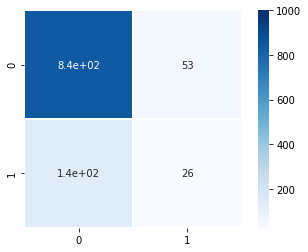

In [920]:
results_knn = confusion_matrix(y_test, predict_knn) 
print(results_knn)
ax=sns.heatmap(results_knn,linewidths=1,vmax=1000,
            square=True, cmap="Blues",annot=True)
#if i don't run the next 2 lines of code, the heatmap will be cut off.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Model 4 - Decission Tree

### Decession Tree validation

In [921]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
predict_decision=decision_tree.predict(X_test)
decision_tree_score=decision_tree.score(X_test, y_test) * 100
print(decision_tree_score)

76.50943396226415


### Decission tree Kfold cross validation 

In [922]:
def run_kfold(decision_tree):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_modeled):
        fold += 1
        X_train, X_test = X_modeled[train_index], X_modeled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        decision_tree.fit(X_train, y_train)
        accuracy_decision_tree = decision_tree.score(X_test, y_test)*100
        outcomes.append(accuracy_decision_tree)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_decision_tree))     
    mean_outcome_decision_tree = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_decision_tree)) #KFold cross validation
    return(mean_outcome_decision_tree)

DT_Kfoldscore=run_kfold(decision_tree)

Fold 1 accuracy: 70.75471698113208
Fold 2 accuracy: 76.88679245283019
Fold 3 accuracy: 79.24528301886792
Fold 4 accuracy: 78.5377358490566
Fold 5 accuracy: 72.64150943396226
Fold 6 accuracy: 75.23584905660378
Fold 7 accuracy: 72.87735849056604
Fold 8 accuracy: 73.82075471698113
Fold 9 accuracy: 73.11320754716981
Fold 10 accuracy: 77.35849056603774
Mean Accuracy: 75.04716981132076


### confusion matrix - decision tree

[[761 134]
 [115  50]]


(2.0, 0.0)

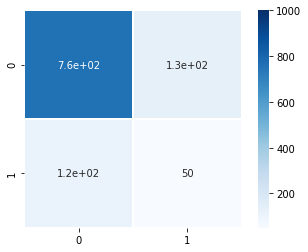

In [923]:
results_decision = confusion_matrix(y_test, predict_decision) 
print(results_decision)
ax=sns.heatmap(results_decision,linewidths=1,vmax=1000,
            square=True, cmap="Blues",annot=True)
#if i don't run the next 2 lines of code, the heatmap will be cut off.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Model 5 - Naive Bayes

### Naive Bayes - validation

In [924]:
from sklearn.naive_bayes import GaussianNB
nb_Classifier_Object = GaussianNB()
nb_Classifier_Object.fit(X_train, y_train)
predict_nb=nb_Classifier_Object.predict(X_test)
NB_score=nb_Classifier_Object.score(X_test,y_test)*100
print(NB_score)

84.0566037735849


### Naive Bayes - Kfold cross validation

In [925]:
           
def run_kfold(nb_Classifier_Object):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_modeled):
        fold += 1
        X_train, X_test = X_modeled[train_index], X_modeled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        nb_Classifier_Object.fit(X_train, y_train)
        accuracy_nb = nb_Classifier_Object.score(X_test, y_test)*100
        outcomes.append(accuracy_nb)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_nb))     
    mean_outcome_nb = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_nb)) #KFold cross validation
    return(mean_outcome_nb)

nb_Kfoldscore=run_kfold(nb_Classifier_Object)

Fold 1 accuracy: 79.95283018867924
Fold 2 accuracy: 83.9622641509434
Fold 3 accuracy: 84.66981132075472
Fold 4 accuracy: 88.44339622641509
Fold 5 accuracy: 85.61320754716981
Fold 6 accuracy: 84.43396226415094
Fold 7 accuracy: 84.43396226415094
Fold 8 accuracy: 84.90566037735849
Fold 9 accuracy: 84.66981132075472
Fold 10 accuracy: 83.01886792452831
Mean Accuracy: 84.41037735849055


### confusion matrix - naive bayes

[[873  22]
 [147  18]]


(2.0, 0.0)

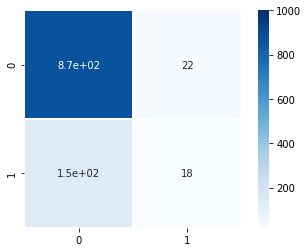

In [926]:
results_nb = confusion_matrix(y_test, predict_nb) 
print(results_nb)
ax=sns.heatmap(results_nb,linewidths=1,vmax=1000,
            square=True, cmap="Blues",annot=True)
#if i don't run the next 2 lines of code, the heatmap will be cut off.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Model 6 - Random Forest

### Random Forest Validation

In [927]:
from sklearn.ensemble import RandomForestClassifier
rf_Classifier_Object = RandomForestClassifier()
rf_Classifier_Object.fit(X_train, y_train)
predict_rf=rf_Classifier_Object.predict(X_test)
RandomForest_score=rf_Classifier_Object.score(X_test, y_test)*100
print(RandomForest_score)


82.64150943396227


/Users/zhengjiaxin/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Random Forest Kfold cross validation

In [928]:

def run_kfold(rf_Classifier_Object):
    kf = KFold(n_splits=10)
    outcomes = []
    fold = 0
    for train_index, test_index in kf.split(X_modeled):
        fold += 1
        X_train, X_test = X_modeled[train_index], X_modeled[test_index]
        y_train, y_test = y[train_index], y[test_index]
        rf_Classifier_Object.fit(X_train, y_train)
        accuracy_rf = rf_Classifier_Object.score(X_test, y_test)*100
        outcomes.append(accuracy_rf)
        print("Fold {0} accuracy: {1}".format(fold, accuracy_rf))     
    mean_outcome_rf = np.mean(outcomes)
    print("Mean Accuracy: {0}".format(mean_outcome_rf)) #KFold cross validation
    return(mean_outcome_rf)

rf_Kfoldscore=run_kfold(rf_Classifier_Object)

Fold 1 accuracy: 79.48113207547169
Fold 2 accuracy: 83.25471698113208
Fold 3 accuracy: 83.01886792452831
Fold 4 accuracy: 84.90566037735849
Fold 5 accuracy: 82.0754716981132
Fold 6 accuracy: 82.54716981132076
Fold 7 accuracy: 83.72641509433963
Fold 8 accuracy: 84.43396226415094
Fold 9 accuracy: 85.37735849056604
Fold 10 accuracy: 83.49056603773585
Mean Accuracy: 83.23113207547169


### confusion matrix - random forest

[[856  39]
 [145  20]]


(2.0, 0.0)

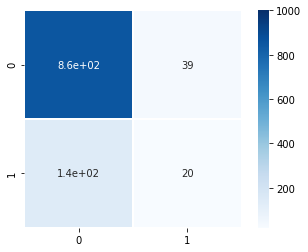

In [929]:
results_rf = confusion_matrix(y_test, predict_rf) 
print(results_rf)
ax=sns.heatmap(results_rf,linewidths=1,vmax=1000,
            square=True, cmap="Blues",annot=True)
#if i don't run the next 2 lines of code, the heatmap will be cut off.
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Model Comparsion

In [930]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression','KNN',  
              'Decision Tree','Naive Bayes', 'Random Forest',
              ],
    'Score': [SVM_score, Logistic_regression_score,knn_score, decision_tree_score, NB_score,
              RandomForest_score],
    'Kfold score': [svc_KFoldScore,logreg_Kfoldscore,knn_Kfoldscore,DT_Kfoldscore, nb_Kfoldscore,
                   rf_Kfoldscore]})
models.sort_values(by='Score', ascending=False)


,Model,Score,Kfold score
1,Logistic Regression,85.283019,85.353774
0,Support Vector Machines,84.150943,84.481132
4,Naive Bayes,84.056604,84.410377
5,Random Forest,82.641509,83.231132
2,KNN,81.886792,82.075472
3,Decision Tree,76.509434,75.047170
